In [17]:
import numpy as np
import pandas as pd
data = pd.read_csv('adult21.csv') 
att = ['LSATIS11R_A','SEX_A','REGION','WEIGHTLBTC_A','DEPFREQ_A','ANXFREQ_A','SAD_A','PAIFRQ3M_A','REPSTRAIN_A','PHSTAT_A', 'EDUCP_A','CANEV_A', 'AGEP_A']
data_pp = data[att]

# Remove columns where 'SEX_A' isn't a 1 or 2
data_drop = data[(data['SEX_A'] == 7) | (data['SEX_A'] == 9)].index
data_pp = data_pp.drop(data_drop, inplace = False)




In [18]:
data_pp_male = data_pp[data_pp['SEX_A'] == 1].drop(columns='SEX_A')
data_pp_female = data_pp[data_pp['SEX_A'] == 2].drop(columns = 'SEX_A')
male_corr = data_pp_male.corr()
female_corr = data_pp_female.corr()

In [35]:
import numbers
from label_parsing import label_parser
lb = label_parser()
desc_att = {}
for i in att:
    desc_att[i] = lb.find_var_label(i)


desc_att_key = list(desc_att.keys())
del desc_att_key[1]
desc_att_values = list(desc_att.values())
del desc_att_values[1]

desc_att_both = [ ':'.join(pair) for pair in zip(desc_att_values,desc_att_key) ]

names_dict = {}
for i, name in enumerate(desc_att_both):
  names_dict[i] = name

#a = {0: 'Life Satisfaction', 1: 'Region', 2: 'Weight', 3: ' Depression', 4: 'Anxiety', 5: 'Sadness', 6:'Pain', 7:'Injury', 8: 'Health Status',
#9: 'Education Level', 10: 'Cancer', 11: 'Age'}
a = ['Life Satisfaction', 'Region','Weight', ' Depression', 'Anxiety', 'Sadness','Pain','Injury', 'Health Status', 'Education Level', 'Cancer', 'Age']

male_corr= male_corr.rename(index=desc_att)
male_corr.columns = a
female_corr = female_corr.rename(index=desc_att)
female_corr.columns = a


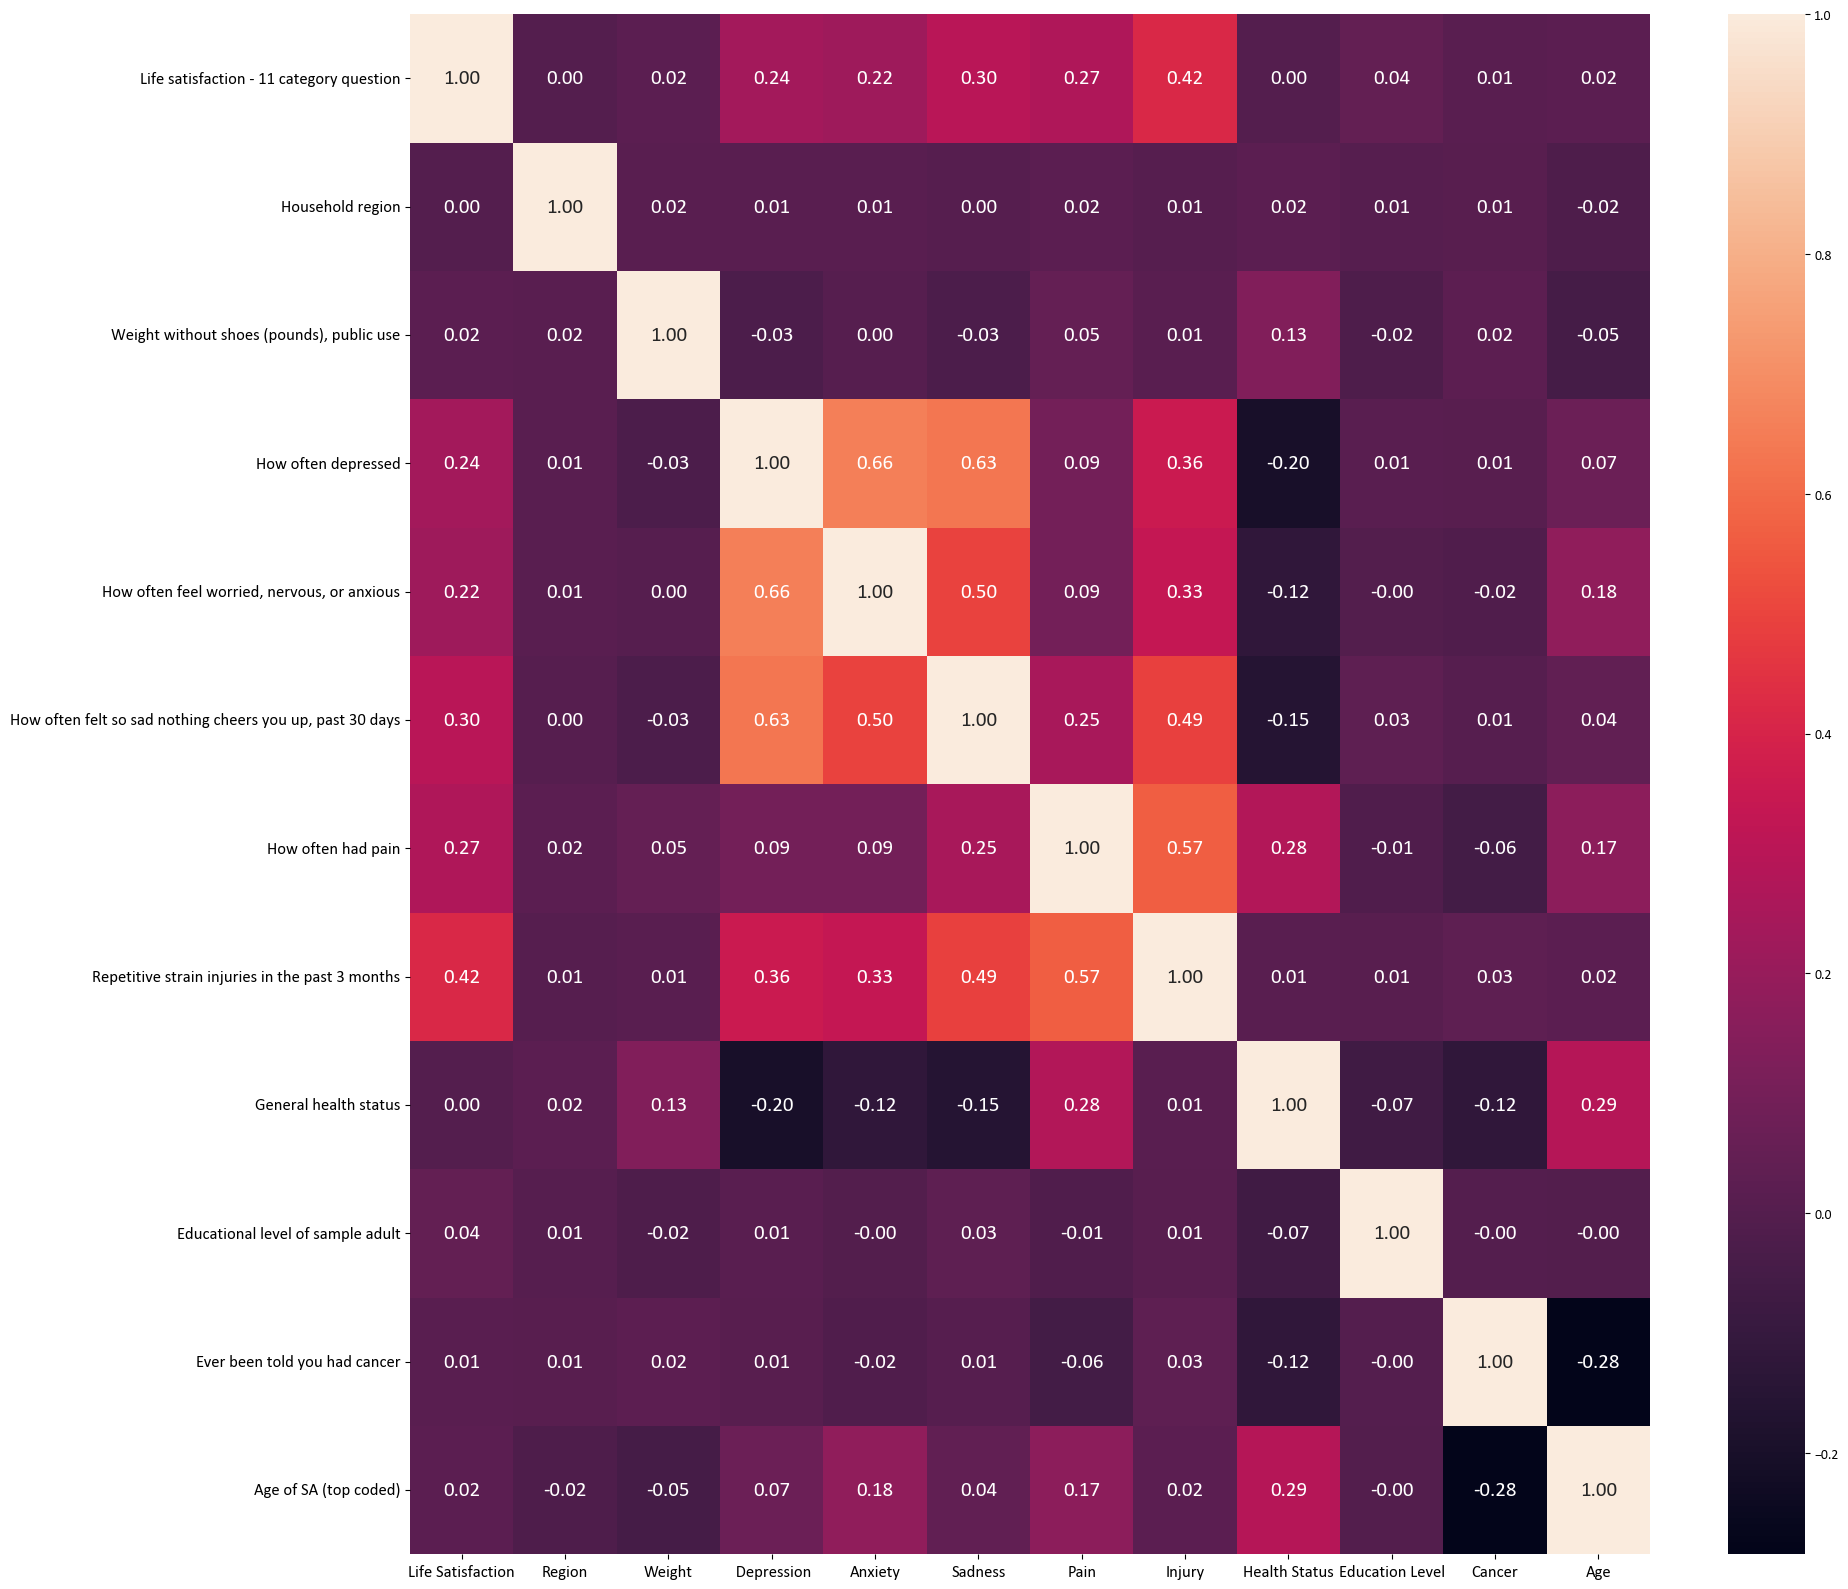

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
sns.set_style({'font.family': 'Calibri'})
sns.heatmap(male_corr, annot=True, fmt='.2f',annot_kws={"fontsize":15})
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()



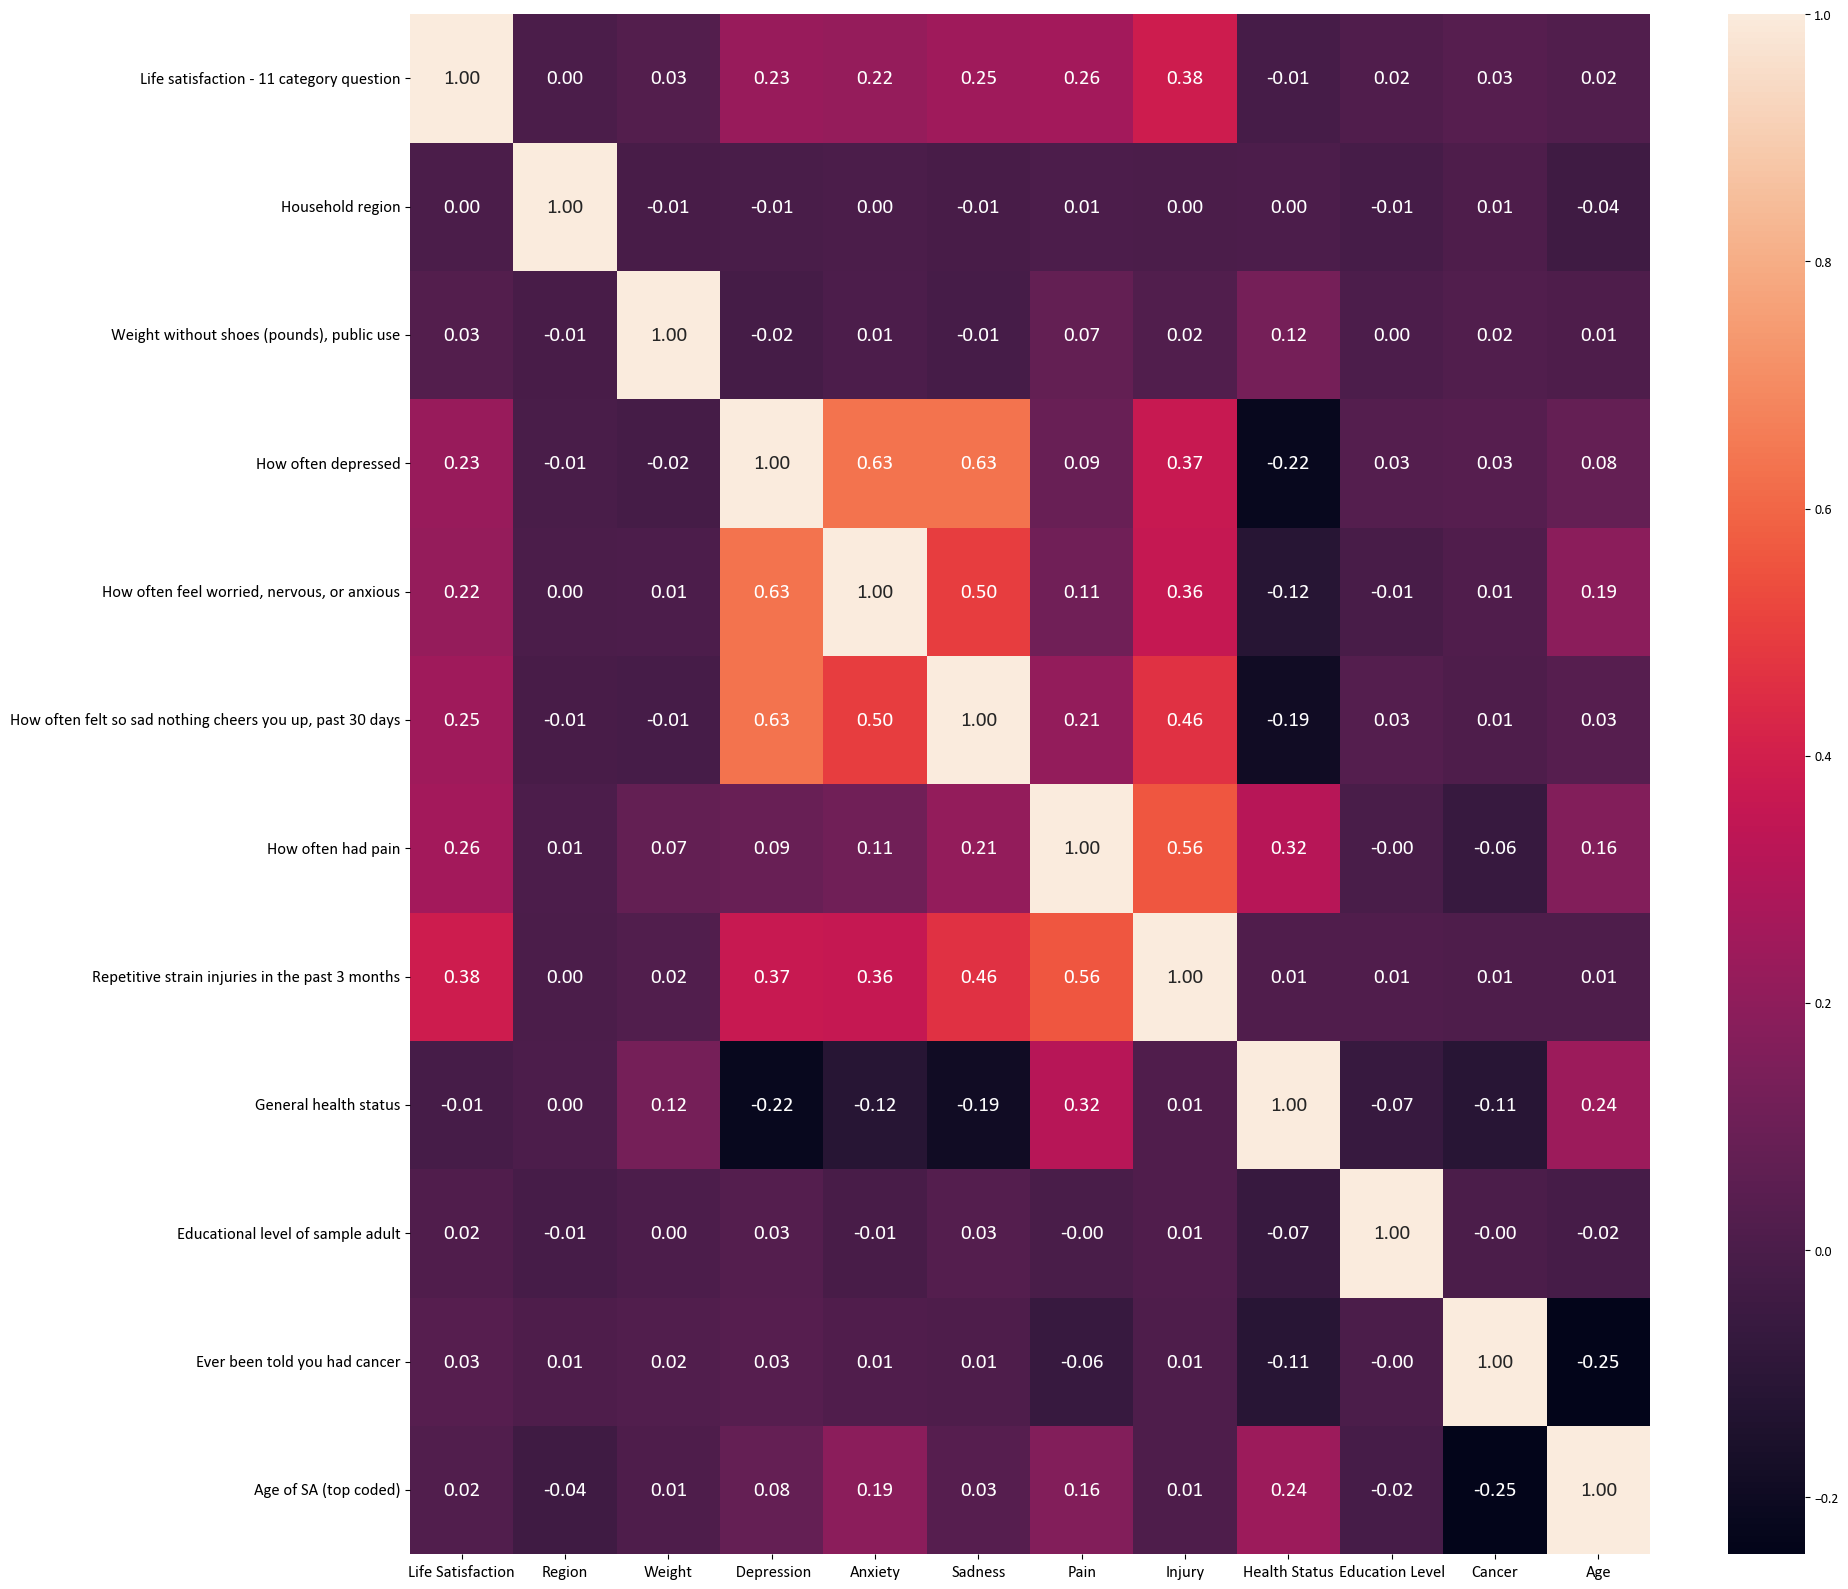

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
sns.set_style({'font.family': 'Calibri'})
sns.heatmap(female_corr, annot=True, fmt='.2f',annot_kws={"fontsize":15})
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

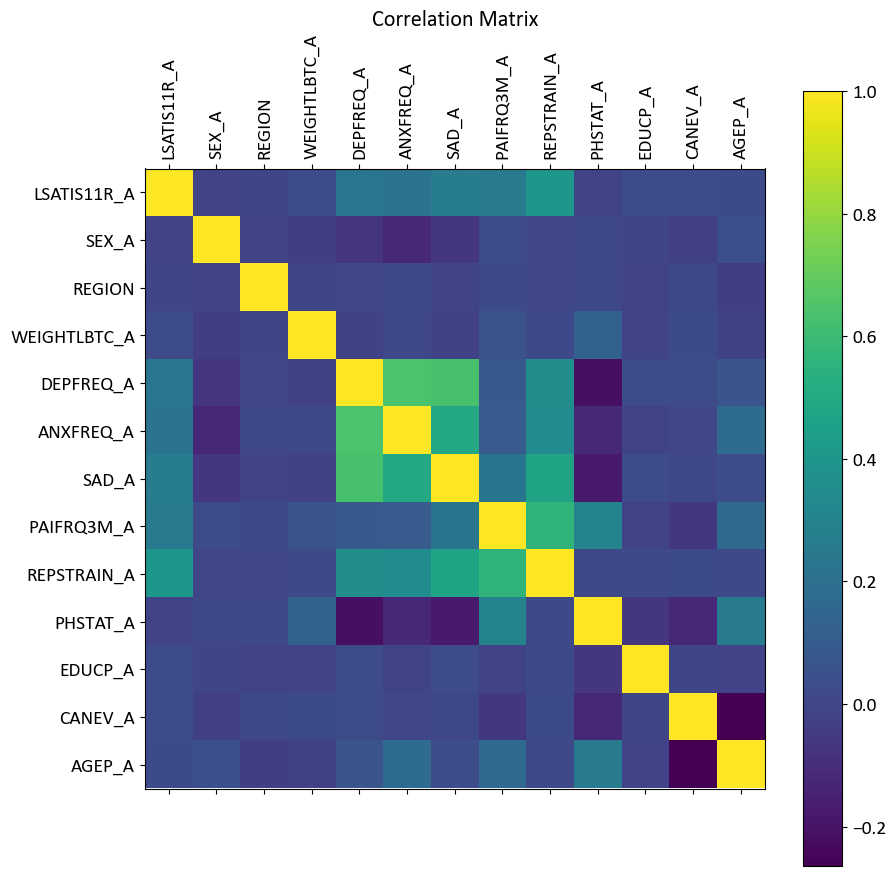

In [22]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10, 10))
plt.matshow(data_pp.corr(), fignum=f.number)
plt.xticks(range(data_pp.select_dtypes(['number']).shape[1]), data_pp.select_dtypes(['number']).columns, fontsize=14, rotation = 90)
plt.yticks(range(data_pp.select_dtypes(['number']).shape[1]), data_pp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)